In [1]:
import random
import logging

import rich

import networkx

In [2]:
from twon_lss.simulations.bcm import (
    Simulation,
    SimulationArgs,
    Ranker,
    Agent,
)

from twon_lss.schemas import Post, User, Feed, Network

In [3]:
logging.getLogger().setLevel(logging.DEBUG)

In [4]:
NUM_AGENTS: int = 25
NUM_NEIGHBORS: int = 8

ARGS = SimulationArgs(num_steps=20, num_posts_to_interact_with=1)

In [5]:
RANKER = Ranker()
rich.print(RANKER)

Ranker(
    args=RankerArgs(weights=RankerInterfaceWeights(network=1.0, individual=1.0), noise=Noise(low=0.8, high=1.2)),
    type='random'
)

In [6]:
USERS = [User() for _ in range(NUM_AGENTS)]
rich.print(USERS)

[
    User(id='user-6257d462-c496-4cd6-a7c7-695d5151a153'),
    User(id='user-e944ff6a-10a7-4340-9523-e16de50af4d4'),
    User(id='user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1'),
    User(id='user-2f34e14c-723f-4d39-a38a-6ca70070f532'),
    User(id='user-087b9568-484d-41e2-8072-e810fdf393c4'),
    User(id='user-feb318a5-27e2-4773-9aa1-27f8df673d46'),
    User(id='user-494d3776-bcd9-4125-960d-e5b82d2bf77e'),
    User(id='user-842789da-56e7-4c96-8ddc-44ea66b1ce3a'),
    User(id='user-78719d84-aac9-4097-b865-83785bb38a70'),
    User(id='user-12135f1f-074a-44b8-94f5-95740fd6d394'),
    User(id='user-94f1550f-25dc-45a4-9b27-35e8e406d329'),
    User(id='user-c889877c-ed2f-474a-bd1c-5b0f91fbfc7d'),
    User(id='user-46af7dcb-eaaa-4010-ad5d-3881801395de'),
    User(id='user-69a7c320-b108-417a-9d6a-3aed99fc0501'),
    User(id='user-1f01a2d5-2492-454d-98c3-8478ffb95db3'),
    User(id='user-dcdeb560-41fe-4750-aa26-b4a2595942fa'),
    User(id='user-c5b54a48-5b36-4036-a25e-cd251002035d'),
    User(id='user-74df4bf0-9b6f-44b4-a773-3d267f1a4987'),
    User(id='user-d0273ac8-82cd-4c5e-8adf-32fa5ceb9892'),
    User(id='user-344690bd-b52a-42fc-b698-17bcb097fdbf'),
    User(id='user-e89b9a1f-0435-4e9c-bb6b-7b9a5ba6ba69'),
    User(id='user-c77b47db-eb02-4163-a240-e598eaa7d9c3'),
    User(id='user-6782f9d7-346b-44b3-b639-a2ea8340f4b8'),
    User(id='user-072e2cd2-ef85-4edc-8db5-c5973acbf1e0'),
    User(id='user-7e3478dd-76cf-4c7a-ac64-6e623d62df56')
]

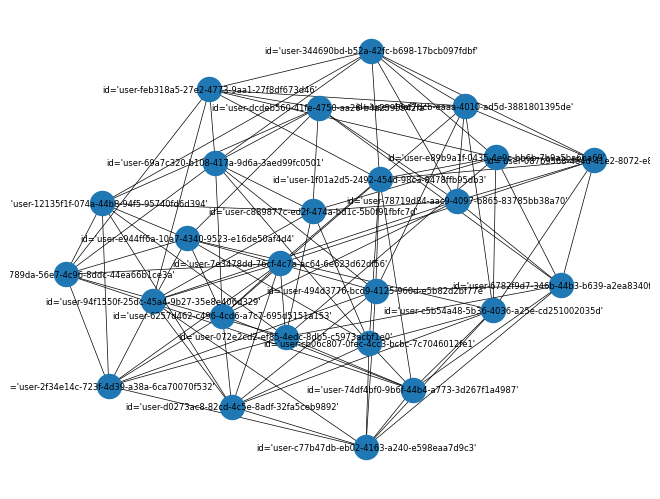

In [7]:
NETWORK = Network.from_graph(
    networkx.random_regular_graph(NUM_NEIGHBORS, len(USERS)), USERS
)
networkx.draw(NETWORK.root, with_labels=True, width=0.5, font_size=6)

In [8]:
FEED = Feed([Post(user=user, content=str(random.uniform(-1.0, 1.0))) for user in USERS])
rich.print(FEED[:3])

[
    Post(
        user=User(id='user-6257d462-c496-4cd6-a7c7-695d5151a153'),
        content='0.844233630761285',
        reads=[],
        likes=[],
        id='post-803e903c-7588-47a9-b934-5bc0556d3e6f',
        timestamp=0
    ),
    Post(
        user=User(id='user-e944ff6a-10a7-4340-9523-e16de50af4d4'),
        content='0.7202523033741619',
        reads=[],
        likes=[],
        id='post-0a2a2060-c091-4fd5-9132-71f3359c454c',
        timestamp=0
    ),
    Post(
        user=User(id='user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1'),
        content='-0.41759207313052693',
        reads=[],
        likes=[],
        id='post-5d34740d-d4d0-4fea-a393-b0e6f05d9d03',
        timestamp=0
    )
]

In [9]:
INDIVIDUALS = {
    user: Agent(
        memory=[float(post.content)],
        eps=2.0,
        delta=0.1,
    )
    for user, post in zip(USERS, FEED.root, strict=False)
}
rich.print(INDIVIDUALS)

{
    User(id='user-6257d462-c496-4cd6-a7c7-695d5151a153'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.844233630761285],
        memory_length=4
    ),
    User(id='user-e944ff6a-10a7-4340-9523-e16de50af4d4'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.7202523033741619],
        memory_length=4
    ),
    User(id='user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.41759207313052693],
        memory_length=4
    ),
    User(id='user-2f34e14c-723f-4d39-a38a-6ca70070f532'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.5945128346823456],
        memory_length=4
    ),
    User(id='user-087b9568-484d-41e2-8072-e810fdf393c4'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.7100757225220717],
        memory_length=4
    ),
    User(id='user-feb318a5-27e2-4773-9aa1-27f8df673d46'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.5011757910902115],
        memory_length=4
    ),
    User(id='user-494d3776-bcd9-4125-960d-e5b82d2bf77e'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.7690420857005704],
        memory_length=4
    ),
    User(id='user-842789da-56e7-4c96-8ddc-44ea66b1ce3a'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.6544517931182625],
        memory_length=4
    ),
    User(id='user-78719d84-aac9-4097-b865-83785bb38a70'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.11555326051132986],
        memory_length=4
    ),
    User(id='user-12135f1f-074a-44b8-94f5-95740fd6d394'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.5827343277428747],
        memory_length=4
    ),
    User(id='user-94f1550f-25dc-45a4-9b27-35e8e406d329'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.022336352910780066],
        memory_length=4
    ),
    User(id='user-c889877c-ed2f-474a-bd1c-5b0f91fbfc7d'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.08146644301012085],
        memory_length=4
    ),
    User(id='user-46af7dcb-eaaa-4010-ad5d-3881801395de'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.30988900452620993],
        memory_length=4
    ),
    User(id='user-69a7c320-b108-417a-9d6a-3aed99fc0501'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.8247345517575706],
        memory_length=4
    ),
    User(id='user-1f01a2d5-2492-454d-98c3-8478ffb95db3'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.6708118410274531],
        memory_length=4
    ),
    User(id='user-dcdeb560-41fe-4750-aa26-b4a2595942fa'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.34163560805235527],
        memory_length=4
    ),
    User(id='user-c5b54a48-5b36-4036-a25e-cd251002035d'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.33530644427604184],
        memory_length=4
    ),
    User(id='user-74df4bf0-9b6f-44b4-a773-3d267f1a4987'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.7624936259857711],
        memory_length=4
    ),
    User(id='user-d0273ac8-82cd-4c5e-8adf-32fa5ceb9892'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.7274048678138985],
        memory_length=4
    ),
    User(id='user-344690bd-b52a-42fc-b698-17bcb097fdbf'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.533220400067115],
        memory_length=4
    ),
    User(id='user-e89b9a1f-0435-4e9c-bb6b-7b9a5ba6ba69'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.3908814551530466],
        memory_length=4
    ),
    User(id='user-c77b47db-eb02-4163-a240-e598eaa7d9c3'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.9231813483768914],
        memory_length=4
    ),
    User(id='user-6782f9d7-346b-44b3-b639-a2ea8340f4b8'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.3318333037309582],
        memory_length=4
    ),
    User(id='user-072e2cd2-ef85-4edc-8db5-c5973acbf1e0'): Agent(
        eps=2.0,
        del

In [10]:
simulation = Simulation(
    args=ARGS,
    ranker=RANKER,
    individuals=INDIVIDUALS,
    network=NETWORK,
    feed=FEED,
)

DEBUG:root:>f init simulation


In [11]:
simulation()

Output()

DEBUG:root:>f simulate step n=0
DEBUG:root:len(feed)=25
DEBUG:root:>i number of feed items 8 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 8 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 8 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 8 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 8 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 8 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 8 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 8 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 8 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 8 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 8 for user user-94f1550f-25dc

DEBUG:root:>f simulate step n=2
DEBUG:root:len(feed)=75
DEBUG:root:>i number of feed items 24 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 24 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 24 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 24 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 24 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 24 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 24 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 24 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 24 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 24 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 24 for user user-94

DEBUG:root:>i number of feed items 32 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 32 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 32 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 32 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 32 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 32 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 32 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 32 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 32 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 32 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 32 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root:>i number 

DEBUG:root:>i number of feed items 40 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 40 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 40 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 40 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 40 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 40 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 40 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 40 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 40 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 40 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 40 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root:>i number 

DEBUG:root:>i number of feed items 48 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 48 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 48 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 48 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 48 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 48 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 48 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 48 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 48 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 48 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 48 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root:>i number 

DEBUG:root:>i number of feed items 56 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 56 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 56 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 56 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 56 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 56 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 56 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 56 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 56 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 56 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 56 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329


DEBUG:root:>i number of feed items 56 for user user-c889877c-ed2f-474a-bd1c-5b0f91fbfc7d
DEBUG:root:>i number of feed items 56 for user user-46af7dcb-eaaa-4010-ad5d-3881801395de
DEBUG:root:>i number of feed items 56 for user user-69a7c320-b108-417a-9d6a-3aed99fc0501
DEBUG:root:>i number of feed items 56 for user user-1f01a2d5-2492-454d-98c3-8478ffb95db3
DEBUG:root:>i number of feed items 56 for user user-dcdeb560-41fe-4750-aa26-b4a2595942fa
DEBUG:root:>i number of feed items 56 for user user-c5b54a48-5b36-4036-a25e-cd251002035d
DEBUG:root:>i number of feed items 56 for user user-74df4bf0-9b6f-44b4-a773-3d267f1a4987
DEBUG:root:>i number of feed items 56 for user user-d0273ac8-82cd-4c5e-8adf-32fa5ceb9892
DEBUG:root:>i number of feed items 56 for user user-344690bd-b52a-42fc-b698-17bcb097fdbf
DEBUG:root:>i number of feed items 56 for user user-e89b9a1f-0435-4e9c-bb6b-7b9a5ba6ba69
DEBUG:root:>i number of feed items 56 for user user-c77b47db-eb02-4163-a240-e598eaa7d9c3
DEBUG:root:>i number 

DEBUG:root:>i number of feed items 64 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 64 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 64 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 64 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 64 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 64 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 64 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 64 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 64 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 64 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 64 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root:>i number 

DEBUG:root:>f simulate step n=8
DEBUG:root:len(feed)=225
DEBUG:root:>i number of feed items 72 for user user-6257d462-c496-4cd6-a7c7-695d5151a153


DEBUG:root:>i number of feed items 72 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 72 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 72 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 72 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 72 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 72 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 72 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 72 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 72 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 72 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root:>i number of feed items 72 for user user-c889877c-ed2f-474a-bd1c-5b0f91fbfc7d
DEBUG:root:>i number 

DEBUG:root:>i number of feed items 80 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 80 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 80 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 80 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 80 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 80 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 80 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 80 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 80 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 80 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 80 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root:>i number 

DEBUG:root:>i number of feed items 80 for user user-dcdeb560-41fe-4750-aa26-b4a2595942fa
DEBUG:root:>i number of feed items 80 for user user-c5b54a48-5b36-4036-a25e-cd251002035d
DEBUG:root:>i number of feed items 80 for user user-74df4bf0-9b6f-44b4-a773-3d267f1a4987
DEBUG:root:>i number of feed items 80 for user user-d0273ac8-82cd-4c5e-8adf-32fa5ceb9892
DEBUG:root:>i number of feed items 80 for user user-344690bd-b52a-42fc-b698-17bcb097fdbf
DEBUG:root:>i number of feed items 80 for user user-e89b9a1f-0435-4e9c-bb6b-7b9a5ba6ba69
DEBUG:root:>i number of feed items 80 for user user-c77b47db-eb02-4163-a240-e598eaa7d9c3
DEBUG:root:>i number of feed items 80 for user user-6782f9d7-346b-44b3-b639-a2ea8340f4b8
DEBUG:root:>i number of feed items 80 for user user-072e2cd2-ef85-4edc-8db5-c5973acbf1e0
DEBUG:root:>i number of feed items 80 for user user-7e3478dd-76cf-4c7a-ac64-6e623d62df56
DEBUG:root:>f simulate step n=10
DEBUG:root:len(feed)=275


DEBUG:root:>i number of feed items 88 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 88 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 88 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 88 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 88 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 88 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46


DEBUG:root:>i number of feed items 88 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 88 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 88 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 88 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root:>i number of feed items 88 for user user-c889877c-ed2f-474a-bd1c-5b0f91fbfc7d
DEBUG:root:>i number of feed items 88 for user user-46af7dcb-eaaa-4010-ad5d-3881801395de
DEBUG:root:>i number of feed items 88 for user user-69a7c320-b108-417a-9d6a-3aed99fc0501
DEBUG:root:>i number of feed items 88 for user user-1f01a2d5-2492-454d-98c3-8478ffb95db3
DEBUG:root:>i number of feed items 88 for user user-dcdeb560-41fe-4750-aa26-b4a2595942fa
DEBUG:root:>i number of feed items 88 for user user-c5b54a48-5b36-4036-a25e-cd251002035d
DEBUG:root:>i number of feed items 88 for user user-74df4bf0-9b6f-44b4-a773-3d267f1a4987
DEBUG:root:>i number 

DEBUG:root:>i number of feed items 96 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 96 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 96 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 96 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 96 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 96 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 96 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 96 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 96 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 96 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 96 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root:>i number 

DEBUG:root:>i number of feed items 96 for user user-072e2cd2-ef85-4edc-8db5-c5973acbf1e0
DEBUG:root:>i number of feed items 96 for user user-7e3478dd-76cf-4c7a-ac64-6e623d62df56
DEBUG:root:>f simulate step n=12
DEBUG:root:len(feed)=325


DEBUG:root:>i number of feed items 104 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 104 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 104 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 104 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 104 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 104 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 104 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 104 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 104 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 104 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 104 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root

DEBUG:root:>i number of feed items 104 for user user-1f01a2d5-2492-454d-98c3-8478ffb95db3
DEBUG:root:>i number of feed items 104 for user user-dcdeb560-41fe-4750-aa26-b4a2595942fa
DEBUG:root:>i number of feed items 104 for user user-c5b54a48-5b36-4036-a25e-cd251002035d
DEBUG:root:>i number of feed items 104 for user user-74df4bf0-9b6f-44b4-a773-3d267f1a4987
DEBUG:root:>i number of feed items 104 for user user-d0273ac8-82cd-4c5e-8adf-32fa5ceb9892
DEBUG:root:>i number of feed items 104 for user user-344690bd-b52a-42fc-b698-17bcb097fdbf
DEBUG:root:>i number of feed items 104 for user user-e89b9a1f-0435-4e9c-bb6b-7b9a5ba6ba69
DEBUG:root:>i number of feed items 104 for user user-c77b47db-eb02-4163-a240-e598eaa7d9c3
DEBUG:root:>i number of feed items 104 for user user-6782f9d7-346b-44b3-b639-a2ea8340f4b8
DEBUG:root:>i number of feed items 104 for user user-072e2cd2-ef85-4edc-8db5-c5973acbf1e0
DEBUG:root:>i number of feed items 104 for user user-7e3478dd-76cf-4c7a-ac64-6e623d62df56
DEBUG:root

DEBUG:root:>i number of feed items 112 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 112 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4


DEBUG:root:>i number of feed items 112 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 112 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 112 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 112 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 112 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 112 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 112 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 112 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 112 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root:>i number of feed items 112 for user user-c889877c-ed2f-474a-bd1c-5b0f91fbfc7d
DEBUG:root:>i number of feed items 112 for user user-46af7dcb-eaaa-4010-ad5d-3881801395de
DEBUG:root

DEBUG:root:>i number of feed items 112 for user user-c77b47db-eb02-4163-a240-e598eaa7d9c3
DEBUG:root:>i number of feed items 112 for user user-6782f9d7-346b-44b3-b639-a2ea8340f4b8
DEBUG:root:>i number of feed items 112 for user user-072e2cd2-ef85-4edc-8db5-c5973acbf1e0
DEBUG:root:>i number of feed items 112 for user user-7e3478dd-76cf-4c7a-ac64-6e623d62df56
DEBUG:root:>f simulate step n=14
DEBUG:root:len(feed)=375


DEBUG:root:>i number of feed items 120 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 120 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 120 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 120 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 120 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 120 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 120 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 120 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a


DEBUG:root:>i number of feed items 120 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 120 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 120 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root:>i number of feed items 120 for user user-c889877c-ed2f-474a-bd1c-5b0f91fbfc7d
DEBUG:root:>i number of feed items 120 for user user-46af7dcb-eaaa-4010-ad5d-3881801395de
DEBUG:root:>i number of feed items 120 for user user-69a7c320-b108-417a-9d6a-3aed99fc0501
DEBUG:root:>i number of feed items 120 for user user-1f01a2d5-2492-454d-98c3-8478ffb95db3
DEBUG:root:>i number of feed items 120 for user user-dcdeb560-41fe-4750-aa26-b4a2595942fa
DEBUG:root:>i number of feed items 120 for user user-c5b54a48-5b36-4036-a25e-cd251002035d
DEBUG:root:>i number of feed items 120 for user user-74df4bf0-9b6f-44b4-a773-3d267f1a4987
DEBUG:root:>i number of feed items 120 for user user-d0273ac8-82cd-4c5e-8adf-32fa5ceb9892
DEBUG:root

DEBUG:root:>i number of feed items 120 for user user-7e3478dd-76cf-4c7a-ac64-6e623d62df56
DEBUG:root:>f simulate step n=15
DEBUG:root:len(feed)=400


DEBUG:root:>i number of feed items 128 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 128 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 128 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1


DEBUG:root:>i number of feed items 128 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 128 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 128 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 128 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 128 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 128 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 128 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 128 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root:>i number of feed items 128 for user user-c889877c-ed2f-474a-bd1c-5b0f91fbfc7d
DEBUG:root:>i number of feed items 128 for user user-46af7dcb-eaaa-4010-ad5d-3881801395de
DEBUG:root:>i number of feed items 128 for user user-69a7c320-b108-417a-9d6a-3aed99fc0501
DEBUG:root

DEBUG:root:>i number of feed items 128 for user user-344690bd-b52a-42fc-b698-17bcb097fdbf
DEBUG:root:>i number of feed items 128 for user user-e89b9a1f-0435-4e9c-bb6b-7b9a5ba6ba69
DEBUG:root:>i number of feed items 128 for user user-c77b47db-eb02-4163-a240-e598eaa7d9c3
DEBUG:root:>i number of feed items 128 for user user-6782f9d7-346b-44b3-b639-a2ea8340f4b8
DEBUG:root:>i number of feed items 128 for user user-072e2cd2-ef85-4edc-8db5-c5973acbf1e0
DEBUG:root:>i number of feed items 128 for user user-7e3478dd-76cf-4c7a-ac64-6e623d62df56
DEBUG:root:>f simulate step n=16
DEBUG:root:len(feed)=425


DEBUG:root:>i number of feed items 136 for user user-6257d462-c496-4cd6-a7c7-695d5151a153


DEBUG:root:>i number of feed items 136 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 136 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 136 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 136 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 136 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 136 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 136 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 136 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 136 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 136 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root:>i number of feed items 136 for user user-c889877c-ed2f-474a-bd1c-5b0f91fbfc7d
DEBUG:root

DEBUG:root:>i number of feed items 136 for user user-c5b54a48-5b36-4036-a25e-cd251002035d
DEBUG:root:>i number of feed items 136 for user user-74df4bf0-9b6f-44b4-a773-3d267f1a4987
DEBUG:root:>i number of feed items 136 for user user-d0273ac8-82cd-4c5e-8adf-32fa5ceb9892
DEBUG:root:>i number of feed items 136 for user user-344690bd-b52a-42fc-b698-17bcb097fdbf
DEBUG:root:>i number of feed items 136 for user user-e89b9a1f-0435-4e9c-bb6b-7b9a5ba6ba69
DEBUG:root:>i number of feed items 136 for user user-c77b47db-eb02-4163-a240-e598eaa7d9c3
DEBUG:root:>i number of feed items 136 for user user-6782f9d7-346b-44b3-b639-a2ea8340f4b8
DEBUG:root:>i number of feed items 136 for user user-072e2cd2-ef85-4edc-8db5-c5973acbf1e0
DEBUG:root:>i number of feed items 136 for user user-7e3478dd-76cf-4c7a-ac64-6e623d62df56
DEBUG:root:>f simulate step n=17
DEBUG:root:len(feed)=450


DEBUG:root:>i number of feed items 144 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 144 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 144 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 144 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 144 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 144 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 144 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 144 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 144 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 144 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 144 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root

DEBUG:root:>i number of feed items 144 for user user-69a7c320-b108-417a-9d6a-3aed99fc0501
DEBUG:root:>i number of feed items 144 for user user-1f01a2d5-2492-454d-98c3-8478ffb95db3
DEBUG:root:>i number of feed items 144 for user user-dcdeb560-41fe-4750-aa26-b4a2595942fa
DEBUG:root:>i number of feed items 144 for user user-c5b54a48-5b36-4036-a25e-cd251002035d
DEBUG:root:>i number of feed items 144 for user user-74df4bf0-9b6f-44b4-a773-3d267f1a4987
DEBUG:root:>i number of feed items 144 for user user-d0273ac8-82cd-4c5e-8adf-32fa5ceb9892
DEBUG:root:>i number of feed items 144 for user user-344690bd-b52a-42fc-b698-17bcb097fdbf
DEBUG:root:>i number of feed items 144 for user user-e89b9a1f-0435-4e9c-bb6b-7b9a5ba6ba69
DEBUG:root:>i number of feed items 144 for user user-c77b47db-eb02-4163-a240-e598eaa7d9c3
DEBUG:root:>i number of feed items 144 for user user-6782f9d7-346b-44b3-b639-a2ea8340f4b8
DEBUG:root:>i number of feed items 144 for user user-072e2cd2-ef85-4edc-8db5-c5973acbf1e0
DEBUG:root

DEBUG:root:>i number of feed items 152 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 152 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 152 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 152 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 152 for user user-087b9568-484d-41e2-8072-e810fdf393c4


DEBUG:root:>i number of feed items 152 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 152 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 152 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 152 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 152 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 152 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329
DEBUG:root:>i number of feed items 152 for user user-c889877c-ed2f-474a-bd1c-5b0f91fbfc7d
DEBUG:root:>i number of feed items 152 for user user-46af7dcb-eaaa-4010-ad5d-3881801395de
DEBUG:root:>i number of feed items 152 for user user-69a7c320-b108-417a-9d6a-3aed99fc0501
DEBUG:root:>i number of feed items 152 for user user-1f01a2d5-2492-454d-98c3-8478ffb95db3
DEBUG:root:>i number of feed items 152 for user user-dcdeb560-41fe-4750-aa26-b4a2595942fa
DEBUG:root

DEBUG:root:>i number of feed items 152 for user user-344690bd-b52a-42fc-b698-17bcb097fdbf
DEBUG:root:>i number of feed items 152 for user user-e89b9a1f-0435-4e9c-bb6b-7b9a5ba6ba69
DEBUG:root:>i number of feed items 152 for user user-c77b47db-eb02-4163-a240-e598eaa7d9c3
DEBUG:root:>i number of feed items 152 for user user-6782f9d7-346b-44b3-b639-a2ea8340f4b8
DEBUG:root:>i number of feed items 152 for user user-072e2cd2-ef85-4edc-8db5-c5973acbf1e0
DEBUG:root:>i number of feed items 152 for user user-7e3478dd-76cf-4c7a-ac64-6e623d62df56
DEBUG:root:>f simulate step n=19
DEBUG:root:len(feed)=500


DEBUG:root:>i number of feed items 160 for user user-6257d462-c496-4cd6-a7c7-695d5151a153
DEBUG:root:>i number of feed items 160 for user user-e944ff6a-10a7-4340-9523-e16de50af4d4
DEBUG:root:>i number of feed items 160 for user user-cb06c807-0fec-4cc3-bcbc-7c7046012fe1
DEBUG:root:>i number of feed items 160 for user user-2f34e14c-723f-4d39-a38a-6ca70070f532
DEBUG:root:>i number of feed items 160 for user user-087b9568-484d-41e2-8072-e810fdf393c4
DEBUG:root:>i number of feed items 160 for user user-feb318a5-27e2-4773-9aa1-27f8df673d46
DEBUG:root:>i number of feed items 160 for user user-494d3776-bcd9-4125-960d-e5b82d2bf77e
DEBUG:root:>i number of feed items 160 for user user-842789da-56e7-4c96-8ddc-44ea66b1ce3a
DEBUG:root:>i number of feed items 160 for user user-78719d84-aac9-4097-b865-83785bb38a70
DEBUG:root:>i number of feed items 160 for user user-12135f1f-074a-44b8-94f5-95740fd6d394
DEBUG:root:>i number of feed items 160 for user user-94f1550f-25dc-45a4-9b27-35e8e406d329


DEBUG:root:>i number of feed items 160 for user user-c889877c-ed2f-474a-bd1c-5b0f91fbfc7d
DEBUG:root:>i number of feed items 160 for user user-46af7dcb-eaaa-4010-ad5d-3881801395de
DEBUG:root:>i number of feed items 160 for user user-69a7c320-b108-417a-9d6a-3aed99fc0501
DEBUG:root:>i number of feed items 160 for user user-1f01a2d5-2492-454d-98c3-8478ffb95db3
DEBUG:root:>i number of feed items 160 for user user-dcdeb560-41fe-4750-aa26-b4a2595942fa
DEBUG:root:>i number of feed items 160 for user user-c5b54a48-5b36-4036-a25e-cd251002035d
DEBUG:root:>i number of feed items 160 for user user-74df4bf0-9b6f-44b4-a773-3d267f1a4987
DEBUG:root:>i number of feed items 160 for user user-d0273ac8-82cd-4c5e-8adf-32fa5ceb9892
DEBUG:root:>i number of feed items 160 for user user-344690bd-b52a-42fc-b698-17bcb097fdbf
DEBUG:root:>i number of feed items 160 for user user-e89b9a1f-0435-4e9c-bb6b-7b9a5ba6ba69
DEBUG:root:>i number of feed items 160 for user user-c77b47db-eb02-4163-a240-e598eaa7d9c3
DEBUG:root